In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
festivales_bcn_16 = pd.read_pickle("./data/festivales_bcn_16_procesado.pkl")

In [71]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [72]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

In [73]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [74]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [75]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [76]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [77]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [78]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [79]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [80]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [81]:
festivales_bcn_16.describe().loc["mean"]

Edicio           14.00
Asistentes    32710.64
Name: mean, dtype: float64

In [82]:
festivales_bcn_16.describe().loc["50%"]

Edicio           13.0
Asistentes    12000.0
Name: 50%, dtype: float64

In [83]:
festivales_bcn_16.describe().loc["max"]

Edicio            48.0
Asistentes    228946.0
Name: max, dtype: float64

In [84]:
festivales_bcn_16.describe().loc["min"]

Edicio           2.0
Asistentes    2600.0
Name: min, dtype: float64

In [85]:
festivales_bcn_16[categoricas_destacadas].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Junio
Estacion,Primavera


Comentarios <br>
La mediana, situada en 13, parece ser más representativa a la hora de ver la cantidad de ediciones que llevan a cuestas los festivales más representativos que han tenido lugar en los últimos 5 años en Barcelona, ya que hay valores bastante alejados de la media, como uno de ellos que lleva 54 ediciones a cuestas, lo que resulta en una media algo distorcionada. <br>
Lo mismo sucede con la cantidad de asistentes, ya que hay casos que van desde los 8mil hasta el casi medio millón, pero el valor más representativo está en torno a los 120 mil.

Frecuencias relativa y absoluta

In [86]:
for catego in categoricas_destacadas:
    print(festivales_bcn_16[catego].value_counts())
    print("\n")

Ambit
Música                         20
Audiovisuals                   14
Arts visuals                    5
Arts escèniques                 4
Multidisciplinaris i altres     4
Lletres                         3
Name: count, dtype: int64


Titularidad
Privada    42
Pública     7
Mixta       1
Name: count, dtype: int64


Mes
Junio         10
Noviembre      8
Mayo           6
Julio          6
Septiembre     4
Marzo          3
Enero          3
Octubre        3
Abril          2
Agosto         2
Febrero        2
Diciembre      1
Name: count, dtype: int64


Estacion
Primavera    16
Otoño        14
Verano       12
Invierno      8
Name: count, dtype: int64




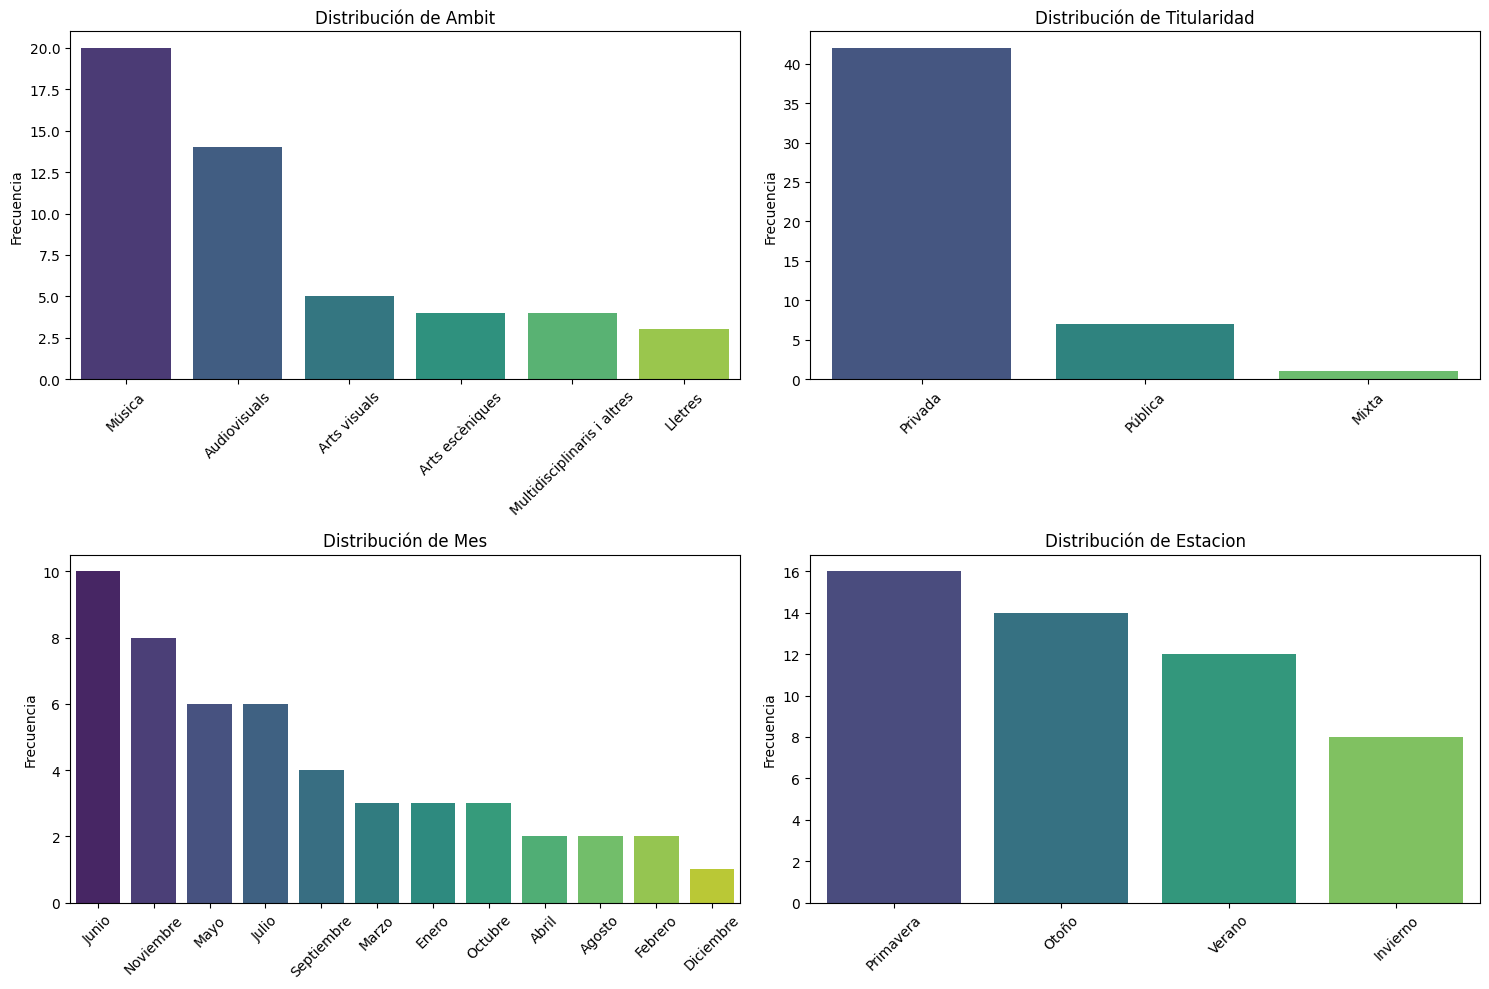

In [87]:
pinta_distribucion_categoricas(festivales_bcn_16, categoricas_destacadas)

Comentarios <br>
Junio parece ser el mes que concentra mayor cantidad de grandes festivales ya establecidos, si bien, a pesar de ello y si miramos según estaciones, es en otoño cuando mñas propuestas de este tipo hay. Cabe destacar, igualmente, que fuera de estos picos hay una distribucion equitativa enntre las otras temporadas. <br>
También es relevante observar que escénicas tiene menos representación en total, frente a las porpuestas musicales o multidisciplinares (que en ciertos casos incluyen tanto música como escénicas). <br>
Y que hay una predominancia de las poropuestas de titularidad pública, aunque seguidas muy de cerca de las privadas.

In [88]:
for catego in categoricas_destacadas:
    print(festivales_bcn_16[catego].value_counts()/len(festivales_bcn_16)*100)
    print("\n")

Ambit
Música                         40.0
Audiovisuals                   28.0
Arts visuals                   10.0
Arts escèniques                 8.0
Multidisciplinaris i altres     8.0
Lletres                         6.0
Name: count, dtype: float64


Titularidad
Privada    84.0
Pública    14.0
Mixta       2.0
Name: count, dtype: float64


Mes
Junio         20.0
Noviembre     16.0
Mayo          12.0
Julio         12.0
Septiembre     8.0
Marzo          6.0
Enero          6.0
Octubre        6.0
Abril          4.0
Agosto         4.0
Febrero        4.0
Diciembre      2.0
Name: count, dtype: float64


Estacion
Primavera    32.0
Otoño        28.0
Verano       24.0
Invierno     16.0
Name: count, dtype: float64




Comentarios:<br>
Si en lugar de atender a las frecuencias absolutas miramos las relativas, las conclusiones son las mismas. No hace falta volver a graficar.

Medidas de posición

In [89]:
festivales_bcn_16.describe()

,Edicio,Asistentes
count,50.000000,50.000000
mean,14.000000,32710.640000
std,9.514758,49184.231501
min,2.000000,2600.000000
25%,6.250000,6237.500000
50%,13.000000,12000.000000
75%,18.750000,33028.750000
max,48.000000,228946.000000


In [90]:
get_IQR(festivales_bcn_16,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

12.5

In [91]:
print(festivales_bcn_16["Edicio"].quantile(0.5), "\n",
    festivales_bcn_16["Edicio"].quantile(0.9), "\n",
    festivales_bcn_16["Edicio"].quantile(0.95), "\n",
    festivales_bcn_16["Edicio"].max())

13.0 
 24.200000000000003 
 28.099999999999994 
 48.0


Comentarios: <br>
Es notable la dispersión de valores cuando miramos el rango intercuartílico en lo referente al número de ediciones, ya que la mediana está en las 13 ediciones, el 90% está por debajo de las 48, y el último 10% concentra picos de más de 50.

In [92]:
get_IQR(festivales_bcn_16,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

26791.25

In [93]:
print(festivales_bcn_16["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_16["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_16["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_16["Asistentes"].max())

12000.0 
 103299.50000000001 
 129603.64999999992 
 228946.0


Comentarios: <br>
Mucho más agudo aún es el pico de número de asistentes, en el que la mediana está en 122.000, el primero 90% en 370mil, que ya es 3 veces más, pero el último segmento pega un salto abrupto superando los 450 mil.

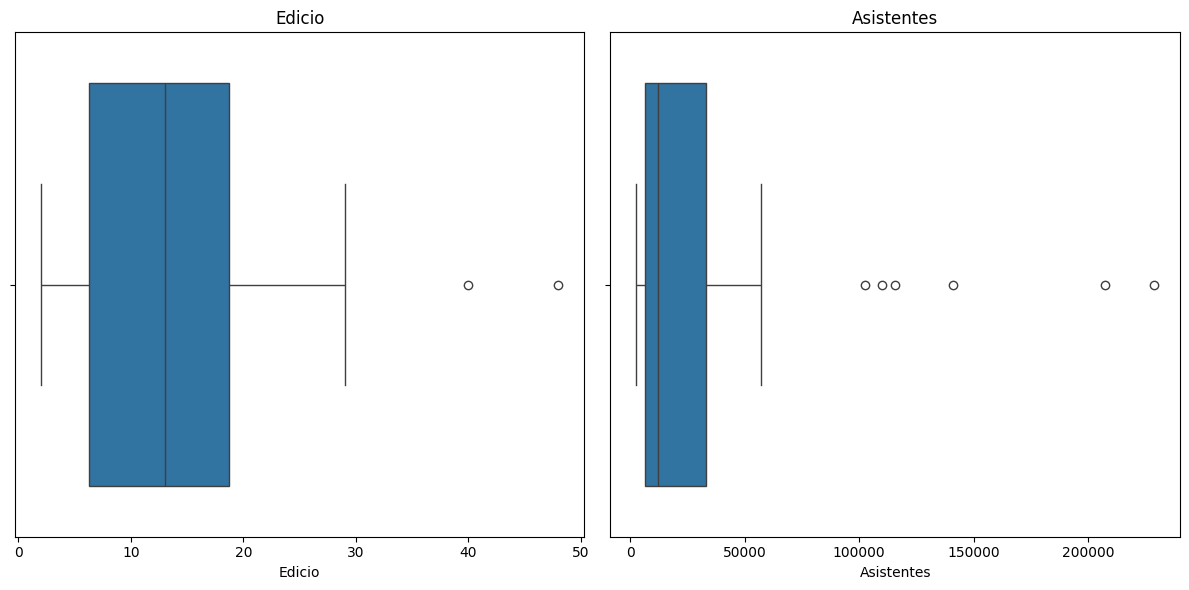

In [94]:
plot_multiple_boxplots(festivales_bcn_16, columnas_numericas_fests)

Comentarios: <br>
Gracias a los boxplots podemos observar como no hay una media centrada, ni en ediciones ni en asistentes, aunque la mayoría de los casos está dentro del rango. Y se ve claramente un outlier, que em el caso de los asistentes, que es el que tiene el casi medio millón de asistentes.

In [95]:
plot_boxplot_grouped(festivales_bcn_16, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [96]:
festivales_bcn_16.describe().loc[["std", "mean"]].T

,std,mean
Edicio,9.514758,14.00
Asistentes,49184.231501,32710.64


In [97]:
variabilidad(festivales_bcn_16)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,9.514758,14.00,0.679626
Asistentes,49184.231501,32710.64,1.503616


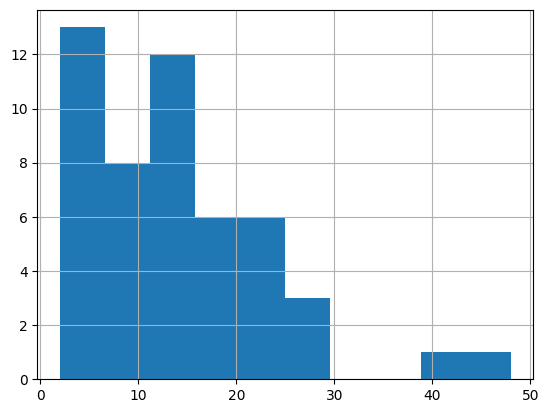

In [98]:
festivales_bcn_16["Edicio"].hist();

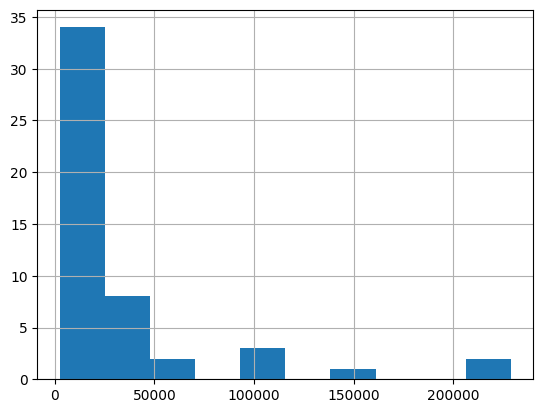

In [99]:
festivales_bcn_16["Asistentes"].hist();

Comentarios: <br>
Hay bastabte dispersión de valores, tanto de asistentes como de número de ediciones.

Distribución

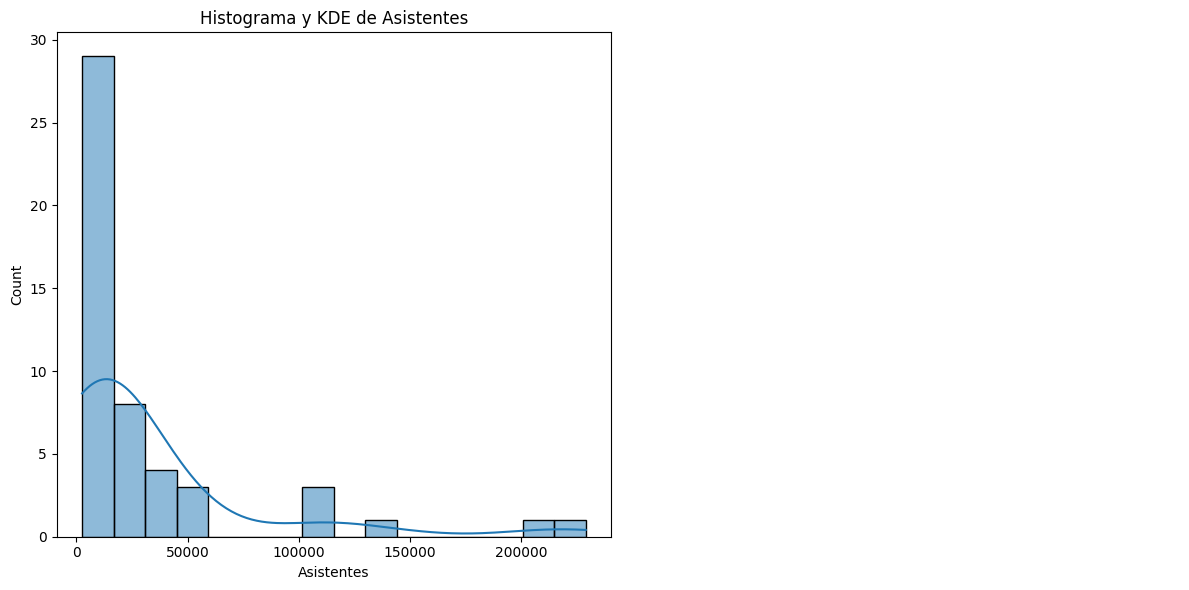

In [100]:
plot_histo_den(festivales_bcn_16, ["Asistentes"])

Anomalías outliers

(2,)


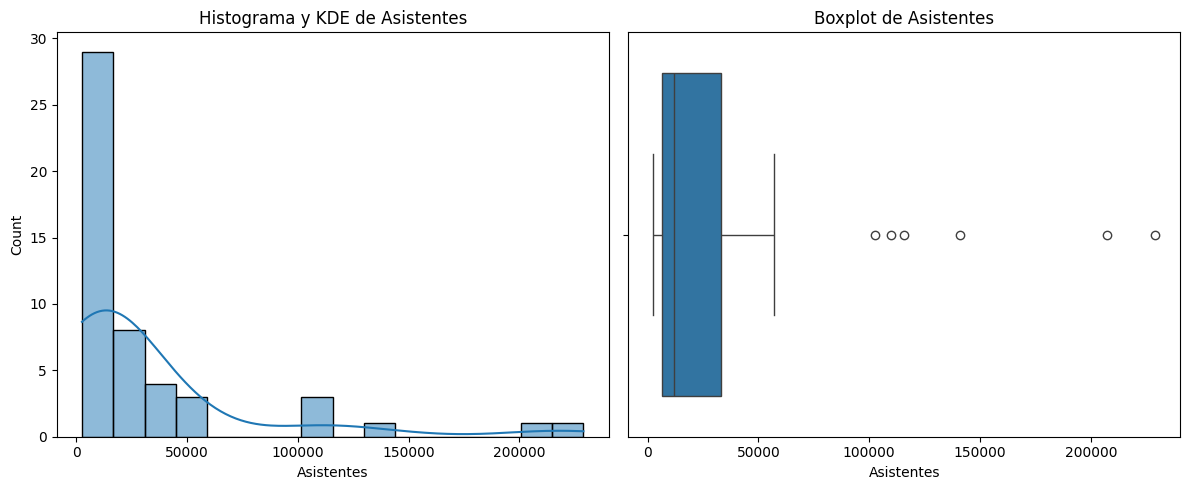

In [101]:
plot_combined_graphs(festivales_bcn_16, ["Asistentes"])

In [102]:
festivales_bcn_16

,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
1,Audiovisuals,3.0,Americana Film Fest,Privada,Marzo,Invierno,5200.0,De Pago
2,Arts visuals,3.0,Art Photo BCN,Privada,Mayo,Primavera,2600.0,De Pago
3,Música,4.0,Bachcelona,Privada,Julio,Verano,5000.0,De Pago
4,Música,24.0,BAM. Barcelona Acció Musical,Pública,Septiembre,Otoño,56950.0,Gratis
5,Arts visuals,11.0,Barcelona Design Week City Festival,Privada,Junio,Primavera,12000.0,De Pago
6,Lletres,19.0,Barcelona Poesia,Pública,Mayo,Primavera,5324.0,Gratis
7,Lletres,11.0,BCNegra. Trobada de Novel·la Negra de Barcelona,Pública,Enero,Invierno,7639.0,Gratis
8,Audiovisuals,5.0,Cinema Lliure a la Platja. Mostra de cinema in...,Privada,Junio,Verano,22000.0,De Pago
9,Audiovisuals,6.0,D'A Film Festival Barcelona,Privada,Abril,Primavera,10585.0,De Pago
10,Música,2.0,DGTL Festival,Privada,Agosto,Verano,30000.0,De Pago
